<a href="https://colab.research.google.com/github/restrepo/lensapi/blob/master/lens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lens API search for institution and range of years or dates

Check: https://docs.api.lens.org/request.html

Get token: https://www.lens.org/lens/user/subscriptions

Examples: https://github.com/cambialens/lens-api-doc

## Functions and global variables

TODO:
Orcid search: https://www.lens.org/lens/scholar/search/results?q=&orcids=0000-0001-6455-5564

In [0]:
import getpass
import pandas as pd
import requests
import sys
import time
import os
if os.getcwd()=='/content':
    !pip install unidecode
import unidecode    

     |████████████████████████████████| 245kB 9.4MB/s 


<!-- #mmkP9Ibp7bDpLNLKZF8bdYDxCQmxXhFuJzJViVKH92kyBlGmatE2
 -->

In [0]:
token=getpass.getpass('token:')

token:··········


In [0]:
url = 'https://api.lens.org/scholarly/search'
size=1000

In [0]:
def query(affiliation="University of Antioquia",range_type="date_published",
          date_ini="2003-01-01",
          date_end="2004-12-31",size=1000):
    if range_type=="year_published":
        date_ini=date_ini.split('-')[0]
        date_end=date_end.split('-')[0]
    data='''{
    "query": {
       "bool": {
         "must": [{
           "match_phrase":{
                    "title": "%s"
               }
           },
           {
           "range": {
           "%s": {
                    "gte": "%s",
                    "lte": "%s"
                }
           } 
           }
         ]
       }
     },
     "size": %i
    }''' %(affiliation,range_type,date_ini,date_end,size)
    return data
def query_title(title="Dark Matter",range_type="date_published",
          date_ini="2003-01-01",
          date_end="2004-12-31",size=1000):
    """
    WARNING: Accents needs to be removed!
    """
    title=unidecode.unidecode(title)
    if range_type=="year_published":
        date_ini=date_ini.split('-')[0]
        date_end=date_end.split('-')[0]
    data='''{
    "query": {
       "bool": {
         "must": [{
           "match_phrase":{
                    "title": "%s"
               }
           },
           {
           "range": {
           "%s": {
                    "gte": "%s",
                    "lte": "%s"
                }
           } 
           }
         ]
       }
     },
     "size": %i
    }''' %(title,range_type,date_ini,date_end,size)
    return data

## Example of search

### Title

In [0]:
r={}
rr=pd.DataFrame()
t="Clima organizacional, migración tecnológica y apagón analógico en la televisión ecuatoriana"
data=query_title(title=t,range_type="year_published",
      date_ini="1900",date_end="2020",size=1000)
headers = {'Authorization': '{}'.format(token), 'Content-Type': 'application/json'}
response = requests.post(url, data=data, headers=headers)
if response.status_code != requests.codes.ok:
  print(response.status_code)
else:
  r=response.text

if r:
    rr=pd.read_json(r) 
rr.shape 

(1, 3)

### Affiliation

In [0]:
data=query(affiliation="University of Antioquia",range_type="year_published",
      date_ini="2003",date_end="2004",size=1000)

In [0]:
data=query(affiliation="dark matter",range_type="date_published",
      date_ini="1900-01-01",date_end="2020-01-01",size=1000)

In [0]:
headers = {'Authorization': '{}'.format(token), 'Content-Type': 'application/json'}
response = requests.post(url, data=data, headers=headers)
if response.status_code != requests.codes.ok:
  print(response.status_code)
else:
  r=response.text

In [0]:
rr=pd.read_json(r)

In [0]:
rr.shape

(1000, 3)

### Check results

In [0]:
udea=pd.DataFrame( list( rr.data.values ) )

In [0]:
udea.title

0    Clima organizacional, migración tecnológica y ...
Name: title, dtype: object

## Full search: University of Antioquia
Maximum number of responses currently is `size=1000` by web is 50000. However the JSON output for the API seem to be more complete: Includes list of citations! no only the number

In [0]:
def get_query(token,data,url='https://api.lens.org/scholarly/search',size=1000):
    headers = {'Authorization': '{}'.format(token), 'Content-Type': 'application/json'}
    response = requests.post(url, data=data, headers=headers)
    if response.status_code != requests.codes.ok:
        sys.exit(response.status_code)
    else:
        return response.text    

In [0]:
udea=pd.DataFrame( list( rr.data.values ) )

In [0]:
year_ranges=[["1900","1994"],["1995","2000"],["2001","2003"]   ]

In [0]:
udea=pd.DataFrame()
for i in range(len(year_ranges)):
    print(year_ranges[i])
    data=query(affiliation="University of Antioquia",range_type="year_published",
      date_ini=year_ranges[i][0],date_end=year_ranges[i][1],size=1000)
    r=get_query(token,data)
    print("query:",pd.read_json(r).shape[0] )
    udea=udea.append( pd.read_json(r)  ).reset_index(drop=True)
    tmp=udea.copy()
    time.sleep(2)

['1900', '1994']
query: 926
['1995', '2000']
query: 943
['2001', '2003']
query: 971


In [0]:
date_ranges=[["2004-01-01","2005-11-30"],["2005-12-01","2006-12-31"],["2007-01-01","2007-12-31"],
             ["2008-01-01","2008-10-31"],["2008-11-01","2009-05-31"],['2009-06-01','2009-12-31'],
             ['2010-07-01', '2010-12-31'],['2011-01-01', '2011-05-31'],['2011-06-01', '2011-12-31'],
             ['2012-01-01', '2012-05-31'],['2012-06-01', '2012-11-30'],['2012-12-01', '2013-03-31'],
             ['2013-04-01', '2013-10-31'],['2013-11-01', '2014-02-28'],['2014-03-01', '2014-10-31'],
             ['2014-11-01', '2015-02-28'],['2015-03-01', '2015-10-31'],['2015-11-01', '2016-03-31'],
             ['2016-04-01', '2016-09-30'],['2016-10-01', '2016-12-31'],['2017-01-01', '2017-06-30'],
             ['2017-07-01', '2017-12-31'],['2018-01-01', '2018-08-31'],['2018-09-01', '2019-06-30']
            ]

In [0]:
FIND_DATES=False
if FIND_DATES:
    m=["","01-31","02-28","03-31","04-30","05-31","06-30","07-31","08-31","09-30","10-31","11-30","12-31"]
    dr=date_ranges[0][1].split('-')

    year="2019-"
    month=6
    if int(dr[1])<12:
        date_ranges=[[dr[0]+'-'+m[int(dr[1])+1].split('-')[0]+'-'+'01',year+m[month]]]
    else:
        date_ranges=[[str(int(dr[0])+1)+'-'+'01'+'-'+'01',year+m[month]]]
    print( date_ranges )

In [0]:
#WARNING: Failed after some i-th request: fix initial range to continue
for i in range(0,len(date_ranges)):
    print(date_ranges[i])
    data=query(affiliation="University of Antioquia",range_type="date_published",
      date_ini=date_ranges[i][0],date_end=date_ranges[i][1],size=1000)
    r=get_query(token,data)
    kk=pd.read_json(r)
    print("query:",i,kk.shape[0] )
    if FIND_DATES:
        if kk.shape[0]>=1000 and month>1:
            month=month-1
            date_ranges=[[date_ranges[0][0],year+m[month]]]
        
    udea=udea.append( kk  ).reset_index(drop=True)
    tmp=udea.copy()

    time.sleep(5)

['2018-01-01', '2018-08-31']
query: 22 971
['2018-09-01', '2019-06-30']
query: 23 841


In [0]:
udea=pd.DataFrame( list( udea.data.values ) ).reset_index(drop=True)

In [0]:
udea.shape

(23830, 32)

In [0]:
udea.to_json('data/udea.json.gz',compression='gzip')

## Analysis

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd

In [0]:
ls data/

lens_udea_lines_True_orient_records.json.gz  udea.json.gz


In [0]:
udea=pd.read_json( 'https://github.com/restrepo/lensapi/raw/master/data/udea.json.gz',compression='gzip')#.reset_index(drop=True) )

In [0]:
#udea=pd.read_json('data/lens_udea_lines_True_orient_records.json.gz',lines=True,orient='records',compression='gzip')#.reset_index(drop=True)

In [4]:
udea.shape

(23830, 32)

In [6]:
udea[:2]

,abstract,author_count,authors,chemicals,clinical_trials,conference,created,date_published,end_page,external_ids,fields_of_study,funding,issue,keywords,languages,lens_id,mesh_terms,open_access,patent_citations,patent_citations_count,publication_supplementary_type,publication_type,references,references_count,scholarly_citations,scholarly_citations_count,source,source_urls,start_page,title,volume,year_published
0,"H a sta h ace unos pocos anos, el carcinoma de...",4,[{'affiliations': [{'name': 'University of Ant...,None,None,None,2018-05-16T03:24:40.711000+00:00,1981-01-01T00:00:00+00:00,140,"[{'value': '2286199698', 'type': 'magid'}]","[Art, Performance art]",None,2,None,"[es, pt]",000-088-883-415-778,None,None,None,NaN,None,None,None,NaN,None,NaN,None,[{'url': 'https://revista.fecolsog.org/index.p...,136,Ca. De endometrio en pacientes jovenes,32,1981
1,The chronic financial crisis of the Colombia e...,1,[{'affiliations': [{'name': 'University of Ant...,None,None,None,2018-05-15T16:38:38.283000+00:00,1986-01-01T00:00:00+00:00,96,"[{'value': '2088684644', 'type': 'magid'}]","[Finance, Debt, Economy, Labour economics, Eco...",None,19,None,"[en, es]",000-171-931-153-424,None,None,None,NaN,None,journal article,None,NaN,[178-901-825-050-525],1.0,{'title': 'Lecturas de Economía'},[{'url': 'http://aprendeenlinea.udea.edu.co/re...,33,Incidencia de los problemas financieros en los...,19,1986


### Entries with publication date

In [7]:
udea.date_published

0        1981-01-01T00:00:00+00:00
1        1986-01-01T00:00:00+00:00
2        1987-01-01T00:00:00+00:00
3        1986-01-01T00:00:00+00:00
4        1992-01-01T00:00:00+00:00
                   ...            
23825    2019-04-26T00:00:00+00:00
23826    2018-12-01T00:00:00+00:00
23827    2018-09-20T00:00:00+00:00
23828    2018-09-18T00:00:00+00:00
23829    2018-12-07T00:00:00+00:00
Name: date_published, Length: 23830, dtype: object

In [0]:
udeay=udea[~udea.date_published.isna()]

In [0]:
udeay['Year']=udea.date_published.apply(lambda s: s.split('-')[0] if type(s)==str else 
                                          s.get('date').split('-')[0] )

In [0]:
udeay=udeay[~udeay['Year'].isna()].reset_index(drop=True)
udeay['Year']=udeay['Year'].astype(int)

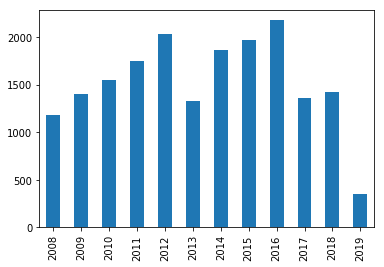

In [0]:
udeay[udeay['Year']>2007]['Year'].value_counts().sort_index().plot(kind='bar')

In [0]:
udeay.shape

(23544, 34)

In [0]:
udeay['doi']=udeay['external_ids'].apply(lambda l:[d.get('value') for d in l if d.get('type')=='doi'] if type(l)==list else None)
udeay['doi']=udeay['doi'].apply(lambda l: l[0] if type(l)==list and len(l)>0 else None)

In [0]:
udea_doi=udeay[~udeay['doi'].isna()]

In [0]:
udea_doi.shape

(7789, 35)

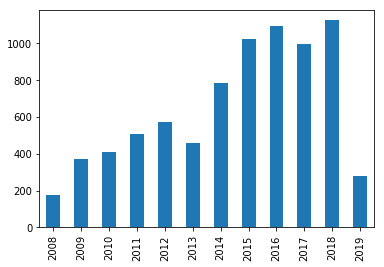

In [0]:
udea_doi[udea_doi['Year']>2007]['Year'].value_counts().sort_index().plot(kind='bar')

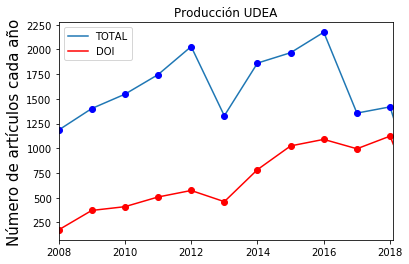

In [0]:
minyear=2007
totx=list( udeay[udeay['Year']>minyear]['Year'].value_counts().sort_index().index )
toty=list( udeay[udeay['Year']>minyear]['Year'].value_counts().sort_index().values )
doix=list( udea_doi[udea_doi['Year']>minyear]['Year'].value_counts().sort_index().index )
doiy=list( udea_doi[udea_doi['Year']>minyear]['Year'].value_counts().sort_index().values )
plt.plot(totx,toty,label='TOTAL')
plt.plot(totx,toty,'bo')
plt.plot(doix,doiy,'r',label='DOI')
plt.plot(doix,doiy,'ro')
plt.legend(loc='best')
plt.xlim(2008,2018.1)
plt.title('Producción UDEA')
plt.ylabel('Número de artículos cada año',size=15)
plt.savefig('totdoi.pdf')

In [0]:
ls /scratch/restrepo/HUGE/JSON/

core_2018-03-01_metadata.tar.gz
lens_co_lines_True_orient_records.json.gz
lens_lat_lines_True_orient_records.json.gz
wget-log
